In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sympy import *
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline 
import math

In [3]:
df = pd.read_csv('mu_pantheon.csv')

In [4]:
df.columns = ['redshift', 'mu', 'error']
z_obs = df.redshift
z_exp = np.arange(0, 2.6, 0.01)
y = df.mu
yerr = df.error
Omega_m = Symbol('Omega_m')
# Omega_m = np.arange(0, 1.0, 0.0001)
nOm = 1001
Omega_m = np.linspace(0,1,num=nOm)
H_0 = 70*10**3
c = 3*10**8

In [11]:
chi2 = []
from scipy import interpolate
for i,Om in enumerate(Omega_m):
    d = (Om * (1 + z_exp)**3 + (1 - Om))**(-0.5)
    dlum = integrate.cumtrapz(d, z_exp, initial = 0.0001)
    mu_exp = 5 * np.log10((c/H_0 * (1 + z_exp)) * dlum) + 25
    mu_int = interpolate.interp1d(z_exp, mu_exp)(z_obs)
    result = np.sum((mu_int - y)**2 / (yerr**2))
    chi2.append(result)

In [6]:
chi2 = np.asarray(chi2)

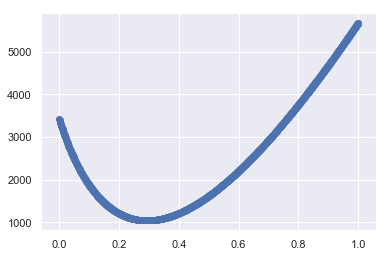

In [7]:
plt.scatter(Omega_m, chi2)

In [8]:
min(chi2)

1042.9682343692116

In [9]:
np.where(chi2 == min(chi2))

(array([293]),)